In [30]:
import numpy as np
import pandas as pd
import re
from geocodio import GeocodioClient
client = GeocodioClient('0f669aa4d57d7dab0ba9b8dd049a9957678985d')



In [31]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [32]:
#  dtype={'Funding': np.float64},
kyf2 = pd.read_excel('KYF2 new compass data 2015.xls', na_values="No Data",
                     skip_footer=2, encoding='xlrd', parse_dates=['Year'])

In [33]:
# convert categories to boolean values
bool_columns = ['Cooking','Tourism','Food Deserts','Beef','Alcohol','Bees','Youth',
                'Beginning Farmers','Organic','Blueberries', 'Heritage','Soilless','Logo/Branding']
kyf2[bool_columns] = kyf2[bool_columns].fillna(value=0)
kyf2[bool_columns] = kyf2[bool_columns].astype(int)
# rename columns
kyf2.rename(columns={'X': 'lon', 'Y':'lat'}, inplace=True)
# kyf2.reset_index(inplace=True)
# kyf_for_geocodio = kyf2[['index',  'lat', 'lon', 'Address', 'State', 'Town', 'Zip']]
# kyf_for_geocodio.to_csv('kyf2latlon1.csv', encoding='utf-8')


In [34]:
kyf2.count()

Title                4185
Name                 4185
Abbreviati           4185
Year                 4185
Address              4185
State                4185
Town                 4185
Zip                  4185
Agency               4185
Mission_Ar           4185
Recipient            4185
Recipient_           4185
Funding              4176
Funding_Ty           4185
Description          4185
Topic_A              4185
Topic_B              4185
Topic_C              4046
More_infor           4185
lon                  4185
lat                  4185
Cooking              4185
Tourism              4185
Food Deserts         4185
Beef                 4185
Alcohol              4185
Bees                 4185
Youth                4185
Beginning Farmers    4185
Organic              4185
Blueberries          4185
Heritage             4185
Soilless             4185
Logo/Branding        4185
dtype: int64

In [35]:
# determine if Funding row has null values
# np.where(pd.isnull(kyf2.Funding))
# kyf2['Funding'].hasnans
# nan_rows = kyf2[kyf2.Funding.isnull()]
# nanFunding_rows = kyf2.Funding.dropna(axis=0, inplace=True)
# nanFunding_rows
# print kyf2.sample(6).iloc[:, 10:-10:].head(12)

# kyf2 = kyf2[pd.notnull(kyf2['Funding'])]
# pd.notnull(kyf2['Funding'])
# Drop the nine records with no data for Funding
kyf2 = kyf2.dropna(subset=['Funding'])


In [36]:
print kyf2.Year.value_counts().sort_index()
print kyf2.Funding_Ty.value_counts().sort_index()
print kyf2.columns

2009-01-01    532
2010-01-01    730
2011-01-01    777
2012-01-01    654
2013-01-01    507
2014-01-01    976
Name: Year, dtype: int64
Grant     4053
Grants       4
Loan       118
grant        1
Name: Funding_Ty, dtype: int64
Index([            u'Title',              u'Name',        u'Abbreviati',
                    u'Year',           u'Address',             u'State',
                    u'Town',               u'Zip',            u'Agency',
              u'Mission_Ar',         u'Recipient',        u'Recipient_',
                 u'Funding',        u'Funding_Ty',       u'Description',
                 u'Topic_A',           u'Topic_B',           u'Topic_C',
              u'More_infor',               u'lon',               u'lat',
                 u'Cooking',           u'Tourism',      u'Food Deserts',
                    u'Beef',           u'Alcohol',              u'Bees',
                   u'Youth', u'Beginning Farmers',           u'Organic',
             u'Blueberries',          u'Herita

In [89]:
# display first 3 records, not including the last 16 columns
# print kyf2.sample(6).iloc[:, 12::].head(12)
print kyf2.iloc[1014:, 10:-3:].head(12)

                                              Recipient  Recipient_  \
1015  Idaho Grape Growers and Wine Producers Commission   Nonprofit   
1016                                     Idaho's Bounty    Producer   
1017  Ida-Ore Planning & Development, Assoc. inc., d...   Nonprofit   
1018               Ida-Ore Planning & Dev. Assoc., Inc.   Nonprofit   
1019                         Intermountain Natural, LLC    Business   
1020               Jefferson Joint School District #251    Academic   
1021               Jefferson Joint School District #251    Academic   
1022                          Salmon Valley Stewardship   Nonprofit   
1023                              City of Moscow, Idaho  Government   
1024                                       Moss Produce    Producer   
1025         Sustainable Community Connections of Idaho   Nonprofit   
1026                      University of Idaho Extension    Academic   

        Funding Funding_Ty                                        Descriptio

In [38]:
kyf2.dtypes

Title                        object
Name                         object
Abbreviati                   object
Year                 datetime64[ns]
Address                      object
State                        object
Town                         object
Zip                          object
Agency                       object
Mission_Ar                   object
Recipient                    object
Recipient_                   object
Funding                     float64
Funding_Ty                   object
Description                  object
Topic_A                      object
Topic_B                      object
Topic_C                      object
More_infor                   object
lon                         float64
lat                         float64
Cooking                       int64
Tourism                       int64
Food Deserts                  int64
Beef                          int64
Alcohol                       int64
Bees                          int64
Youth                       

In [39]:
grantre = re.compile('grant.?', re.IGNORECASE)
# np.where(re.match(grantre, kyf2.Funding_Ty))
# kyf2.Funding_Ty.to_replace(grantre, "Grant")
kyf2['grant'] = np.where(kyf2.Funding_Ty.str.contains(grantre), 1,0)
print "Grants: ", sum(kyf2['grant'])
kyf2['loan'] = np.where(kyf2.Funding_Ty.str.contains('Loan'), 1,0)
print "Loans: ", sum(kyf2['loan'])

Grants:  4058
Loans:  118


1.4.3


/Users/marjorieroswell/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


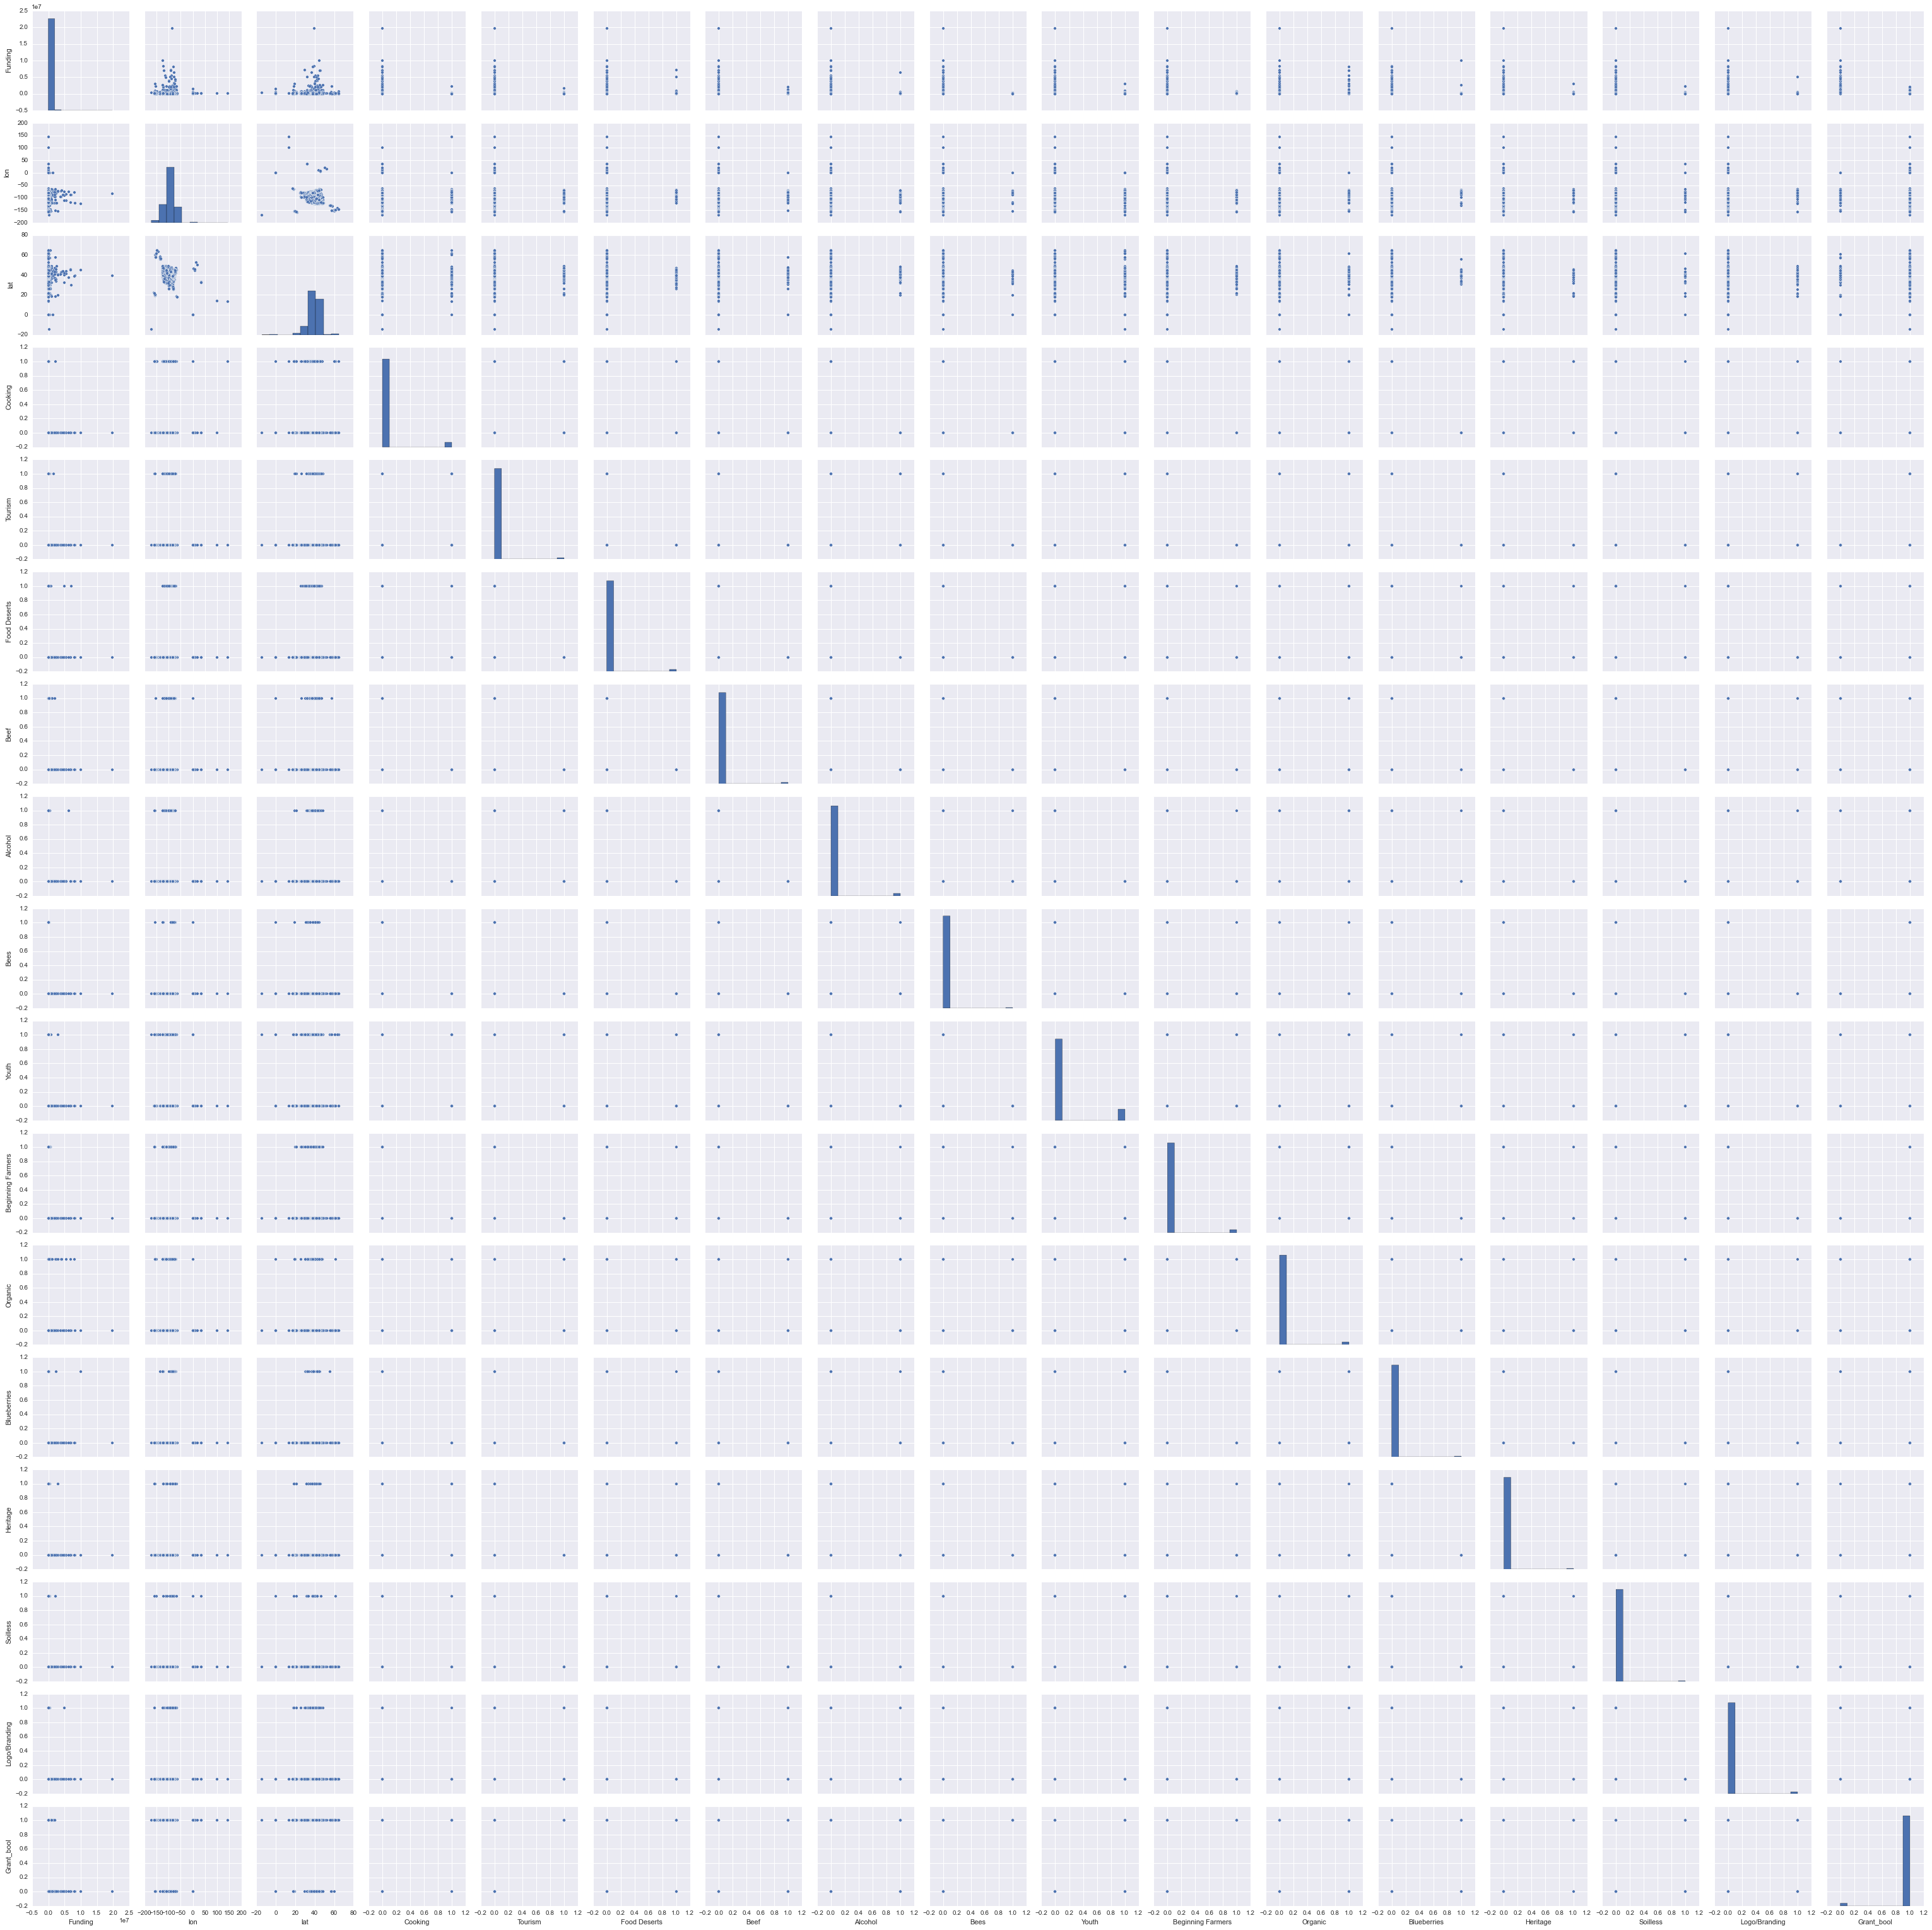

In [29]:
print matplotlib.__version__
# sns.pairplot(kyf2)

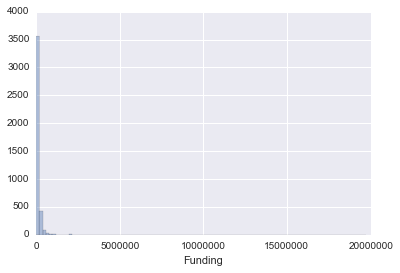

In [94]:
sns.plt.ticklabel_format(style='plain', axis='both',useOffset=False)

sns.distplot(kyf2['Funding'], kde=False, bins =100)

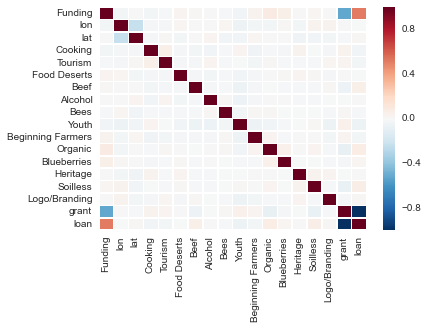

In [60]:
corr = kyf2.corr()
sns.heatmap(corr, linewidths= 0.25)

In [87]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '${:,.2f}'.format
kyf2.groupby(['grant','loan']).Funding.mean()


grant  loan
0      1      $1,774,474.42
1      0         $89,918.68
Name: Funding, dtype: float64

In [88]:
pd.options.display.float_format = None

In [ ]:
locations = kyf2[['lat', 'lon']].sample(30).head(30)
locationlist = locations.values.tolist()
len(locationlist)
locations

In [67]:
withdistricts= client.geocode("3443 Guilford Terrace, Baltimore, MD 21218", fields=["cd", "stateleg"])
# geo2.lookups
results = withdistricts.values()[1][0]
fields = results['fields']
cd = fields['congressional_district']['district_number']
su = fields['state_legislative_districts']['senate']['district_number']
sl = fields['state_legislative_districts']['house']['district_number']
su_name = fields['state_legislative_districts']['senate']['name']
sl_name = fields['state_legislative_districts']['house']['name']
cty = results['address_components']['county']
state = results['address_components']['state']
accuracy = results['accuracy']
accuracy_type = results['accuracy_type']
# withdistricts.accuracy
# withdistricts.values()
# # withdistricts.fields
withdistricts.values()
print cd, su, sl, su_name, sl_name, cty, state, accuracy, accuracy_type

7 43 43 State Senate District 43 State Legislative District 43 Baltimore city MD 1 rooftop


In [ ]:
locations['coords']=tuple(zip(locations.lat, locations.lon))
locations['coords'].tolist()
# coordscol = locations['coords']
# coordscol.tolist
loclist

In [ ]:
location = client.reverse((33.738987, -116.4083), fields=["cd", "stateleg", "census"])
print 
location.values()[0][0]['fields']['congressional_district']['district_number']
location.form

In [ ]:
sample_locations.formatted_addresses

In [ ]:
sample_locations

In [ ]:
# locations.get('')
sample_locations.get('results')

In [ ]:
'''
{
'4324': '(37.3256, -105.63459),
'4356': {'lat': 0, 'lon': 180, 'district': 4}
}
'''

In [ ]:
locations['coords']

In [ ]:
sample_locations1 = client.reverse([
        (33.738987, -116.4083),
        (33.738987, -106.4083),
        (38.879138, -76.98187)
    ],  fields=["cd", "stateleg"])
sample_locations.lookups

In [ ]:
sample_loc_results = sample_locations.get('33.738987,-106.4083')
# fields = sample_locations[1][0]['fields']
# cd = fields['congressional_district']['district_number']
# type(fields)
cong_dist = sample_loc_results.values()[0][0]['fields']['congressional_district']['district_number']
flds = sample_loc_results.values()[0][0]['fields']
cd=flds['congressional_district']['district_number']
sl = flds['state_legislative_districts']['house']['district_number']
su = flds['state_legislative_districts']['senate']['district_number']
print cd, sl, su

In [ ]:
sample_locations.lookups

In [ ]:
sample_locations.get((38.879138,-76.98187))

In [ ]:
kyfgeo = client.reverse(loclist, fields=["cd", "stateleg", 'census'])
# kyfgeo.get('32.372458,-81.557286')
type(kyfgeo)
kyfgeo.formatted_addresses

In [ ]:
dists = {}
counter = 0
for loc in kyfgeo:
    if loc.formatted_address[-8:-6] == 'DC':
        print "in DC"
        counter += 1
    else:
        flds = loc.values()[0][0]['fields']    
        cd=flds['congressional_district']['district_number']
        sl = flds['state_legislative_districts']['house']['district_number']
        su = flds['state_legislative_districts']['senate']['district_number']
        dists[counter] = {}
        dists[counter]['cd'] = cd
        dists[counter]['sl'] = sl
        dists[counter]['su'] = su
        counter += 1
print dists



In [ ]:
fields = locations.values()[1][0]['fields']
cd = fields['congressional_district']['district_number']
sl = fields['state_legislative_districts']['house']['district_number']
su = fields['state_legislative_districts']['senate']['district_number']
type(fields)


locations.get('38.879138,-76.98187')[0]['congressional_district']

In [ ]:
geocoded_addresses[0]['results'][0]['location']